In [35]:
## Importing Packages
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
import matplotlib.lines as mlines
import statsmodels.api as sm
import seaborn as sns
import warnings


In [36]:
## Loading Data
por = pd.read_csv("student-alcohol-consumption/student-mat.csv")
math = pd.read_csv("student-alcohol-consumption/student-por.csv")



In [37]:
## Combining 2 dataframe
df = pd.concat([por,math], sort= True, ignore_index=False)

## Make a copy of the dataframe for statistical analysis
df_stats = pd.concat([por,math], sort= True, ignore_index=False)

## Make a copy of the dataframe to print out
df_nice = pd.concat([por,math], sort= True, ignore_index=False)

In [54]:
df_nice = df.rename({'Fjob':'Father Job', 'Fedu':'Feather Education (0=none, 5=higher edu)', 'Mjob':'Mother Job', 'Medu':'Mother Education (0=none, 5=higher edu)', 'G1':'Period 1 Grades (0-20 Scale)', 
               'G2':'Period 2 Grades (0-20 Scale)', 'G3':'Final Grade (0-20 Scale)', 'Pstatus':'Parents Living Together(T), Apart(A)',
                'absences':'Number of School Absences', 'activities':'Extra Curricular Activities', 'address':'Urban(U)/Rural(R) Location', 
                'age': 'Student Age', 'failures':'Number of Failures', 'famrel':'Family Relationship Quality (1=not good, 5=good)', 'famsize':'Family Size (LE3:<=3, GT3:>3', 'famsup':'Family Education Support', 'freetime':'Free Time (1=low, 5=high)',
                'goout':'Go Out w/ Friends (1=low, 5=high)', 'guardian':'Guardian', 'health':'Current Health Status (1=bad, 5=good)', 'higher':'Wants to take Higher Education', 'internet':'Internet', 
                'nursery':'Attended Nursery School', 'paid':'Paid for Extra Classes', 'reason':'Reason to Choose this School', 'romantic':'In a Romantic Relationship', 'school':'Student School (GP=Gabriel Pereira, MS=Mousinho da Silveira)', 
                'schoolsup':'Extra Educational Support', 'sex':'Student Sex', 'studytime':'Weekly Studytime', 'traveltime':'Travel Time to School (1=<15 min, 2=15-30 min, 3=30 min-1 hour, 4=>1 hour)', 'Dalc':'Weekday Alc Consumption (1=low, 5=high)', 'Walc':'Weekend Alc Consumption (1=low, 5=high)'}, axis='columns')
df_nice.head()

,Course,"Weekday Alc Consumption (1=low, 5=high)","Feather Education (0=none, 5=higher edu)",Father Job,Period 1 Grades (0-20 Scale),Period 2 Grades (0-20 Scale),Final Grade (0-20 Scale),"Mother Education (0=none, 5=higher edu)",Mother Job,"Parents Living Together(T), Apart(A)","Weekend Alc Consumption (1=low, 5=high)",Number of School Absences,Extra Curricular Activities,Urban(U)/Rural(R) Location,Student Age,Number of Failures,"Family Relationship Quality (1=not good, 5=good)","Family Size (LE3:<=3, GT3:>3",Family Education Support,"Free Time (1=low, 5=high)","Go Out w/ Friends (1=low, 5=high)",Guardian,"Current Health Status (1=bad, 5=good)",Wants to take Higher Education,Internet,Attended Nursery School,Paid for Extra Classes,Reason to Choose this School,In a Romantic Relationship,"Student School (GP=Gabriel Pereira, MS=Mousinho da Silveira)",Extra Educational Support,Student Sex,Weekly Studytime,"Travel Time to School (1=<15 min, 2=15-30 min, 3=30 min-1 hour, 4=>1 hour)"
0,Math,1,4,teacher,5,6,6,4,at_home,A,1,6,no,U,18,0,4,GT3,no,3,4,mother,3,yes,no,yes,no,course,no,GP,yes,F,2,2
1,Math,1,1,other,5,5,6,1,at_home,T,1,4,no,U,17,0,5,GT3,yes,3,3,father,3,yes,yes,no,no,course,no,GP,no,F,2,1
2,Math,2,1,other,7,8,10,1,at_home,T,3,10,no,U,15,3,4,LE3,no,3,2,mother,3,yes,yes,yes,yes,other,no,GP,yes,F,2,1
3,Math,1,2,services,15,14,15,4,health,T,1,2,yes,U,15,0,3,GT3,yes,2,2,mother,5,yes,yes,yes,yes,home,yes,GP,no,F,3,1
4,Math,1,3,other,6,10,10,3,other,T,2,4,no,U,16,0,4,GT3,yes,3,2,father,5,yes,no,yes,yes,home,no,GP,no,F,2,1


In [39]:
## Changing numeric variables to categorical variables
df_stats['internet'] = df_stats.internet.factorize( ['yes', 'no'] )[0]
df_stats['activities'] = df_stats.activities.factorize( ['yes', 'no'] )[0]
df_stats['romantic'] = df_stats.romantic.factorize( ['yes', 'no'] )[0]
df_stats["Dalc"] = df_stats["Dalc"].values
df_stats["goout"] = df_stats["goout"].values.astype(str).astype(int)

## Creating new variables "social index"
df_stats["index"] = df_stats['goout'] * 0.25 + df_stats['internet'] * 0.02 + df_stats['romantic'] * 0.03 + df_stats['activities'] * -0.01
df_nice["Social Index"] = df_stats["index"]

## Creating new variables "drinking index"
df_stats["drinking"] = (df_stats["Walc"] * 5 + df_stats["Dalc"] * 2) / 7 
df_nice["Drinking Index"] = df_stats["drinking"]


df_nice.head()

,Course,"Weekday Alc Consumption (1=low, 5=high)","Feather Education (0=none, 5=higher edu)",Father Job,Period 1 Grades (0-20 Scale),Period 2 Grades (0-20 Scale),Final Grade (0-20 Scale),"Mother Education (0=none, 5=higher edu)",Mother Job,"Parents Living Together(T), Apart(A)","Weekend Alc Consumption (1=low, 5=high)",Number of School Absences,Extra Curricular Activities,Urban(U)/Rural(R) Location,Student Age,Number of Failures,"Family Relationship Quality (1=not good, 5=good)","Family Size (LE3:<=3, GT3:>3",Family Education Support,"Free Time (1=low, 5=high)","Go Out w/ Friends (1=low, 5=high)",Guardian,"Current Health Status (1=bad, 5=good)",Wants to take Higher Education,Internet,Attended Nursery School,Paid for Extra Classes,Reason to Choose this School,In a Romantic Relationship,"Student School (GP=Gabriel Pereira, MS=Mousinho da Silveira)",Extra Educational Support,Student Sex,Weekly Studytime,"Travel Time to School (1=<15 min, 2=15-30 min, 3=30 min-1 hour, 4=>1 hour)",Social Index,Drinking Index
0,Math,1,4,teacher,5,6,6,4,at_home,A,1,6,no,U,18,0,4,GT3,no,3,4,mother,3,yes,no,yes,no,course,no,GP,yes,F,2,2,1.00,1.000000
1,Math,1,1,other,5,5,6,1,at_home,T,1,4,no,U,17,0,5,GT3,yes,3,3,father,3,yes,yes,no,no,course,no,GP,no,F,2,1,0.77,1.000000
2,Math,2,1,other,7,8,10,1,at_home,T,3,10,no,U,15,3,4,LE3,no,3,2,mother,3,yes,yes,yes,yes,other,no,GP,yes,F,2,1,0.52,2.714286
3,Math,1,2,services,15,14,15,4,health,T,1,2,yes,U,15,0,3,GT3,yes,2,2,mother,5,yes,yes,yes,yes,home,yes,GP,no,F,3,1,0.54,1.000000
4,Math,1,3,other,6,10,10,3,other,T,2,4,no,U,16,0,4,GT3,yes,3,2,father,5,yes,no,yes,yes,home,no,GP,no,F,2,1,0.50,1.714286


In [40]:
df_stats['Dalc'] = df_stats.Dalc.astype('category')
df_stats['Walc'] = df_stats.Walc.astype('category')
df_stats['health'] = df_stats.health.astype('category')
df_stats['goout'] = df_stats.goout.astype('category')
df_stats['freetime'] = df_stats.freetime.astype('category')
df_stats['famrel'] = df_stats.famrel.astype('category')
df_stats['studytime'] = df_stats.studytime.astype('category')
df_stats['traveltime'] = df_stats.traveltime.astype('category')
df_stats['Fedu'] = df_stats.Fedu.astype('category')
df_stats['Medu'] = df_stats.Medu.astype('category')
df_stats['internet'] = df_stats.internet.astype('category')
df_stats['romantic'] = df_stats.romantic.astype('category')
df_stats['activities'] = df_stats.activities.astype('category')

In [41]:
df2 = df_stats[['Medu', 'Fedu', 'drinking']]

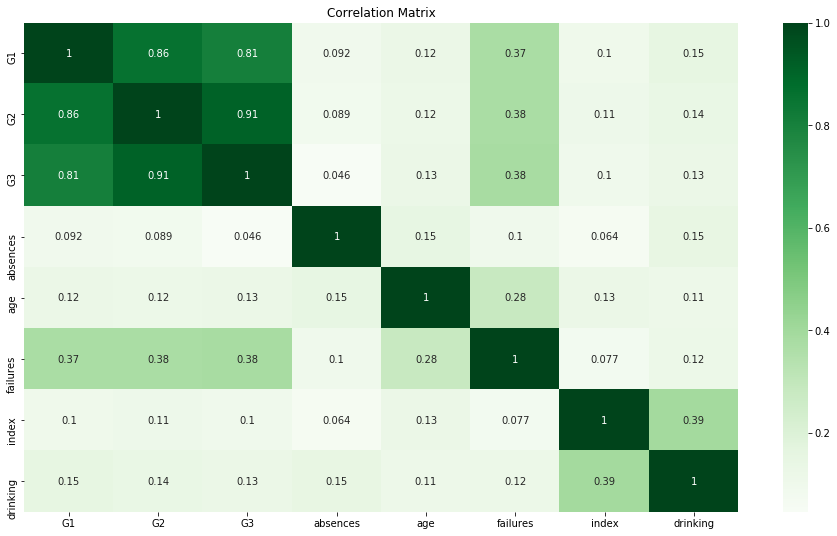

In [42]:
plt_heat_map = plt.figure(figsize=(16,9))
sns.heatmap(df_stats.corr().abs(), annot=True, cmap="Greens").set_title('Correlation Matrix')
plt.show()
plt_heat_map.savefig('img/plt_heat_map.png', dpi=plt_heat_map.dpi)

In [43]:
regression = smf.ols(formula='drinking ~ school + sex + age + address + Pstatus + famsize +Medu + Fedu + Mjob + Fjob + reason + guardian + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + health + absences + Course + G1 + G2 + G3 + index', data = df_stats).fit()
regression.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               drinking   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     10.07
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           5.39e-70
Time:                        11:48:49   Log-Likelihood:                -1320.1
No. Observations:                1044   AIC:                             2768.
Df Residuals:                     980   BIC:                             3085.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0987      0.690      0.143      0.886      -1.256       1.453
school[T.MS]            -0.0349      0.080     -0.437      0.663      -0.192       0.122
sex[T.M]                 0.5601      0.064      8.754      0.000       0.435       0.686
address[T.U]            -0.1000      0.072     -1.387      0.166      -0.242       0.041
Pstatus[T.T]             0.0563      0.094      0.597      0.551      -0.129       0.242
famsize[T.LE3]           0.1804      0.065      2.776      0.006       0.053       0.308
Medu[T.1]               -0.5001      0.316     -1.584      0.114      -1.120       0.120
Medu[T.2]               -0.7287      0.317     -2.302      0.022      -1.350      -0.107
Medu[T.3]               -0.5355      0.321     -1.670      0.095      -1.165       0.094
Medu[T.4]               -0.7043      0.330     -2.135      0.033      -1.352      -0.057
Fedu[T.1]                0.8912      0.313      2.845      0.005       0.276       1.506
Fedu[T.2]                0.8991      0.316      2.847      0.004       0.279       1.519
Fedu[T.3]                0.9227      0.319      2.893      0.004       0.297       1.549
Fedu[T.4]                1.0224      0.326      3.133      0.002       0.382       1.663
Mjob[T.health]          -0.1158      0.146     -0.792      0.429      -0.403       0.171
Mjob[T.other]           -0.1194      0.085     -1.397      0.163      -0.287       0.048
Mjob[T.services]        -0.0809      0.101     -0.797      0.425      -0.280       0.118
Mjob[T.teacher]          0.0839      0.139      0.604      0.546      -0.188       0.356
Fjob[T.health]           0.0744      0.197      0.379      0.705      -0.311       0.460
Fjob[T.other]            0.2393      0.126      1.895      0.058      -0.009       0.487
Fjob[T.services]         0.4353      0.132      3.298      0.001       0.176       0.694
Fjob[T.teacher]         -0.1507      0.181     -0.834      0.405      -0.505       0.204
reason[T.home]           0.0597      0.075      0.800      0.424      -0.087       0.206
reason[T.other]          0.2665      0.100      2.674      0.008       0.071       0.462
reason[T.reputation]     0.1025      0.078      1.317      0.188      -0.050       0.255
guardian[T.mother]      -0.1167      0.072     -1.630      0.103      -0.257       0.024
guardian[T.other]       -0.3010      0.136     -2.213      0.027      -0.568      -0.034
traveltime[T.2]         -0.1055      0.066     -1.587      0.113      -0.236       0.025
traveltime[T.3]          0.0769      0.119      0.646      0.518      -0.157       0.311
traveltime[T.4]          0.6269      0.199      3.145      0.002       0.236       1.018
studytime[T.2]          -0.2385      0.071     -3.355      0.001      -0.378      -0.099
studytime[T.3]          -0.2966      0.099     -3.005    

In [44]:
df_stats.corr().abs()

,G1,G2,G3,absences,age,failures,index,drinking
G1,1.000000,0.858739,0.809142,0.092425,0.124121,0.374175,0.101864,0.154532
G2,0.858739,1.000000,0.910743,0.089332,0.119475,0.377172,0.110463,0.138028
G3,0.809142,0.910743,1.000000,0.045671,0.125282,0.383145,0.100047,0.127247
absences,0.092425,0.089332,0.045671,1.000000,0.153196,0.099998,0.063925,0.148002
age,0.124121,0.119475,0.125282,0.153196,1.000000,0.282364,0.127127,0.113593
failures,0.374175,0.377172,0.383145,0.099998,0.282364,1.000000,0.076624,0.117166
index,0.101864,0.110463,0.100047,0.063925,0.127127,0.076624,1.000000,0.393339
drinking,0.154532,0.138028,0.127247,0.148002,0.113593,0.117166,0.393339,1.000000


In [45]:
df_nice['prediction'] = pd.DataFrame(regression.predict())

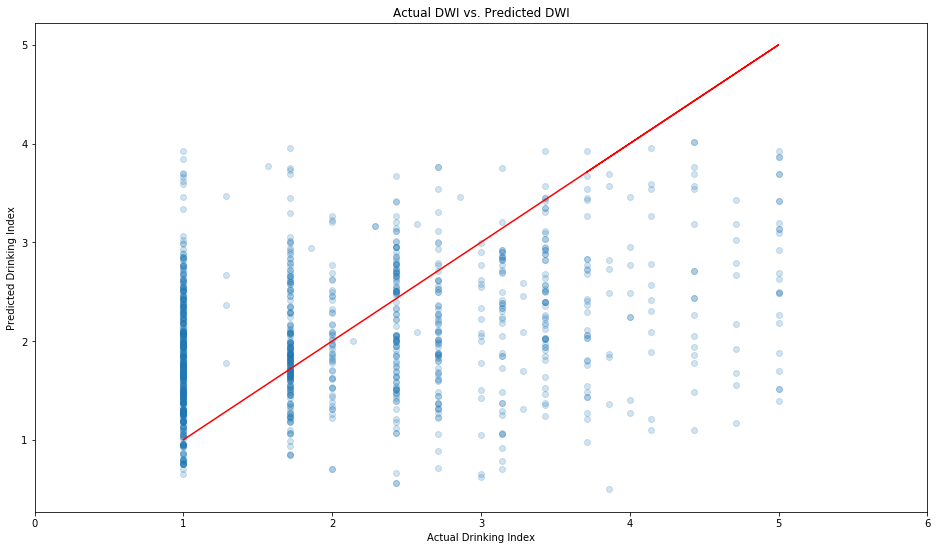

In [46]:
plt_actual_pred_dwi_before = plt.figure(figsize=(16,9))
plt.scatter(df_nice["Drinking Index"], df_nice["prediction"], alpha=0.2)
plt.xlabel("Actual Drinking Index")
plt.ylabel("Predicted Drinking Index")
plt.title("Actual DWI vs. Predicted DWI")
plt.plot(df_nice["Drinking Index"], df_nice["Drinking Index"], c="r")
plt.xlim(0,6)
plt.xlim(0,6)
plt.show()
plt_actual_pred_dwi_before.savefig('img/plt_actual_pred_dwi_before.png', dpi=plt_actual_pred_dwi_before.dpi)

In [47]:
regression_aft_removing = smf.ols(formula='drinking ~ sex + age + Medu + Fedu + Fjob + reason + guardian + traveltime + studytime+ paid + nursery + famrel + goout + health + absences + Course + index', data = df_stats).fit()
# regression_aft_removing.summary()

In [48]:
df_nice['full_prediction'] = pd.DataFrame(regression_aft_removing.predict())


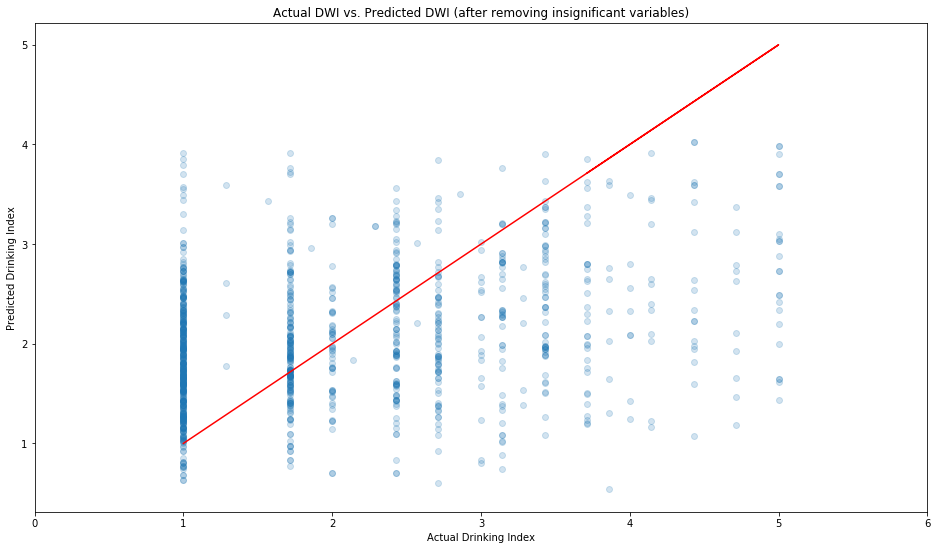

In [49]:
plt_actual_pred_dwi_aft = plt.figure(figsize=(16,9))
plt.scatter(df_nice["Drinking Index"], df_nice["full_prediction"], alpha=0.2)
plt.xlabel("Actual Drinking Index")
plt.ylabel("Predicted Drinking Index")
plt.title("Actual DWI vs. Predicted DWI (after removing insignificant variables)")
plt.plot(df_nice["Drinking Index"], df_nice["Drinking Index"], c="r")
plt.xlim(0,6)
plt.xlim(0,6)
plt.show()
plt_actual_pred_dwi_aft.savefig('img/plt_actual_pred_dwi_aft.png', dpi=plt_actual_pred_dwi_aft.dpi)

In [50]:
# removing prediciton and full_prediction from nice dataframe
df_nice = df_nice.drop(['prediction'], axis=1)
df_nice = df_nice.drop(['full_prediction'], axis=1)
df_nice = df_nice.drop(['Social Index'], axis=1)
df_nice = df_nice.drop(['Drinking Index'], axis=1)
df_nice.head()


,Course,"Weekday Alc Consumption (1=low, 5=high)","Feather Education (0=none, 5=higher edu)",Father Job,Period 1 Grades (0-20 Scale),Period 2 Grades (0-20 Scale),Final Grade (0-20 Scale),"Mother Education (0=none, 5=higher edu)",Mother Job,"Parents Living Together(T), Apart(A)","Weekend Alc Consumption (1=low, 5=high)",Number of School Absences,Extra Curricular Activities,Urban(U)/Rural(R) Location,Student Age,Number of Failures,"Family Relationship Quality (1=not good, 5=good)","Family Size (LE3:<=3, GT3:>3",Family Education Support,"Free Time (1=low, 5=high)","Go Out w/ Friends (1=low, 5=high)",Guardian,"Current Health Status (1=bad, 5=good)",Wants to take Higher Education,Internet,Attended Nursery School,Paid for Extra Classes,Reason to Choose this School,In a Romantic Relationship,"Student School (GP=Gabriel Pereira, MS=Mousinho da Silveira)",Extra Educational Support,Student Sex,Weekly Studytime,"Travel Time to School (1=<15 min, 2=15-30 min, 3=30 min-1 hour, 4=>1 hour)"
0,Math,1,4,teacher,5,6,6,4,at_home,A,1,6,no,U,18,0,4,GT3,no,3,4,mother,3,yes,no,yes,no,course,no,GP,yes,F,2,2
1,Math,1,1,other,5,5,6,1,at_home,T,1,4,no,U,17,0,5,GT3,yes,3,3,father,3,yes,yes,no,no,course,no,GP,no,F,2,1
2,Math,2,1,other,7,8,10,1,at_home,T,3,10,no,U,15,3,4,LE3,no,3,2,mother,3,yes,yes,yes,yes,other,no,GP,yes,F,2,1
3,Math,1,2,services,15,14,15,4,health,T,1,2,yes,U,15,0,3,GT3,yes,2,2,mother,5,yes,yes,yes,yes,home,yes,GP,no,F,3,1
4,Math,1,3,other,6,10,10,3,other,T,2,4,no,U,16,0,4,GT3,yes,3,2,father,5,yes,no,yes,yes,home,no,GP,no,F,2,1


In [51]:
df_nice.shape

(1044, 34)

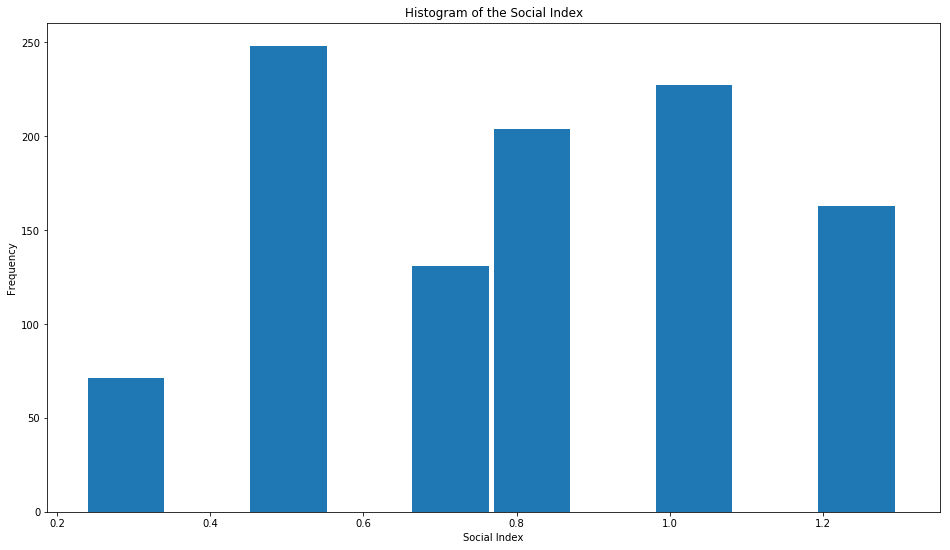

In [27]:
plt_hist_social_index = plt.figure(figsize=(16,9))
plt.hist(df_nice["Social Index"], width = 0.1)
plt.xlabel("Social Index")
plt.ylabel("Frequency")
plt.title("Histogram of the Social Index")
plt.show()
plt_hist_social_index.savefig('img/plt_hist_social_index.png', dpi=plt_hist_social_index.dpi)

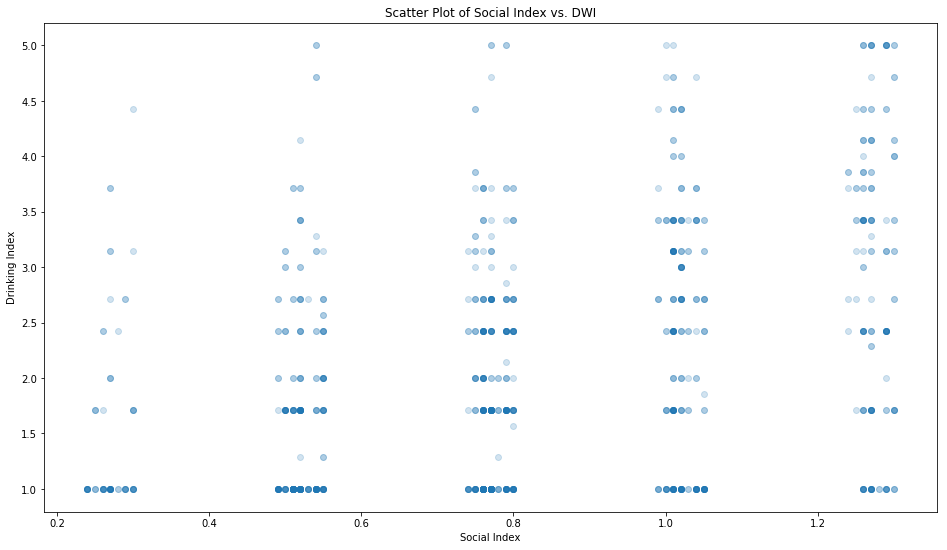

In [28]:
plt_scatter_social_dwi = plt.figure(figsize=(16,9))
plt.scatter(df_nice["Social Index"], df_nice["Drinking Index"], alpha=0.2)
plt.xlabel("Social Index")
plt.ylabel("Drinking Index")
plt.title("Scatter Plot of Social Index vs. DWI")
plt.plot()
plt_scatter_social_dwi.savefig('img/plt_scatter_social_dwi.png', dpi=plt_scatter_social_dwi.dpi)

In [29]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model